# Dinâmica Molecular


# Anotações


## Aula 07/06

- Comprimento de de Broglie define o regime em que podemos usar mecânica classíca.
    $$ \lambda = \frac{\hbar}{p} $$

- Potencial  de Lennard-Jonnes: https://en.wikipedia.org/wiki/Lennard-Jones_potential
$$ \mathcal{U}(\vec{r}) = 4 \epsilon \left[ \left(\frac{\sigma}{r} \right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

$$ \frac{\mathcal{U}}{\epsilon} = \tilde{\mathcal{U}} = 4 \left[ \left(\frac{1}{\tilde{r}} \right)^{12} - \left(\frac{1}{\tilde{r}}\right)^6 \right] $$

$$ \tilde{r} \equiv \frac{r}{\sigma} $$

Queremos encontrar o ponto de mínmo no gráfico do potencial de lenner-jonnes

$$
        \frac{d \mathcal{U}}{d r} = \frac{d(\epsilon \tilde{\mathcal{U}}}{d(\sigma \tilde{r})} \dots
$$

- Simulação: gás em uma superficie - gás 2D


$$

    m \frac{d^2 \vec{r}_i}{dt^2} = \sum_{i = 1}^{N} \sum_{j \neq i}^{N} \vec{F}(\vec{r}_i - \vec{r}_j) \frac{(\vec{r}_i - \vec{r}_j)}{|\vec{r}_i - \vec{r}_j|}

$$




$$ \mathcal{U}(\vec{r}_i - \vec{r}_j) = 4 \epsilon \left[ \frac{\sigma^{12}}{|\vec{r}_i - \vec{r}_j|^{12}} -\frac{\sigma^6}{|\vec{r}_i - \vec{r}_j|^6} \right]$$

- Escala de tempo da dinâmica é $t \sim \sqrt{m\sigma^2 / \epsilon}$
($10^-12$ segundos)

- Discretização das equações: 

$$ t = n \Delta t $$


$$
    x_i(n+1) = 2 x_i(n) - x_i (n-1) + a_{i, x}(n) (\Delta t)^2
$$


$$ 
    y_i(n+1) = 2y_i(n) - y_i(n-1) + a_{i, y}(n) (\Delta t)^2
$$

- Métodos de Euler e o de Verlet.

Condições iniciais:

$$
x(1) = x(0) + v_{j,x} (0) \Delta t
$$
$$
y(1) = y(0) + v_{j, y} (0) \Delta t
$$


$$ 

    v_{i, x} = \frac{x_i(n+1) - x_i(n-1)}{2 \Delta t}
$$
$$
    v_{i, y} = \frac{y_i(n+1) - y_i(n-1)}{2 \Delta t}
$$



-   Simulação com malha quadrada 2D de comprimento $L$ 
-   Adotamos $\sqrt{L}$ como número de partículas.
-   Inicializa particulas na malha com alguma velocidade inicial.
-   Condições periódicas de contorno.

- Sistema em equílibrio deve obedecer a distribuição de Maxwell-Boltzmann.

- Desafio: colocar uma molecula maior que as outras e observar o movimento dela durante a dinâmica.
Isso é o movimento browniano da partícula.
Fazer calculo de valor esperado, media de distancia quadrática para obter distribuição.


## Derivando as relações 14/06

Partindo da segunda lei de Newton 

$$ m \frac{d^2}{dt^2} \vec{r} = \vec{F} = |F| \frac{\hat{r}}{|r|} $$

para sistema com $N$ partículas interagindo temos 


$$ m \frac{d^2}{dt^2} \vec{r}_j = \sum_{j=1}^{N} \sum_{\ell \neq j}^{N} F(|\vec{r}_j - \vec{r}_{\ell}|)\frac{\vec{r}_j - \vec{r}_\ell}{|\vec{r}_{j} - \vec{r}_\ell|} $$

com $\vec{r}_j = (x_j, y_j)$  e $|\vec{r}_j - \vec{r}_\ell| = \sqrt{(x_j-x_\ell)^2 - (y_j-y_\ell)^2} = r_{j, \ell}$.

como $F$ é uma força central em cada interação das partículas pode ser dada por 
$$ F(r_{j, \ell}) = - \frac{\partial \mathcal{U}}{\partial r_{j, \ell}} $$


definindo $\sigma = \varepsilon = 1$ podemos obter as grandezas pro sistema em unidades de 
$m, \epsilon$ e $\sigma$. Isso vai simplificar os cálculos. Então 
a força exercida pela particula $j$ na $\ell$ pode ser obtida com 

$$
    F_{j, \ell} = 24 \left( \frac{2}{r_{j, \ell}^{13}} - \frac{1}{r_{j, \ell}^7} \right)
$$


e a força que $\ell$ exerce em $j$ é simplesmente 

$$
    F_{\ell, j} = - F_{j, \ell}
$$

#### Discretização do sistema


$$ \frac{d^2}{dt^2} \vec{r}_j = \frac{1}{m}  $$

$$
    a^{x}_{j} = \frac{1}{m} \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \cos(\theta_{j, \ell})
$$
$$
    a^{y}_{j} = \frac{1}{m} \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \sin(\theta_{j, \ell})
$$

No nosso sistema de unidades com $ m = 1 $ temos 

$$
    a^{x}_{j} = \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \cos(\theta_{j, \ell})
$$
$$
    a^{y}_{j} = \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \sin(\theta_{j, \ell})
$$

+ Método de Verlet:
- Posição e velocidade das partículas à cada passo $t = n \Delta t$:

Para $n \geq 1$ 
$$  x_{j}(n+1) = 2 x_j(n) - x_j(n-1)+ a_j^x(n) (\Delta t)^2  $$
$$  y_{j}(n+1) = 2 y_j(n) - y_j(n-1)+ a_j^y(n) (\Delta t)^2  $$


Posições iniciais: 

$$ x_j (1) = x(0) + v_{j}^x (0) \Delta t $$
$$ y_j (1) = y(0) + v_{j}^y (0) \Delta t $$

onde $x(0)$ e $y(0)$ é a posição inicial de todas as partículas.


Velocidade iniciais:

$$ v_{j}^x = \frac{x_j (n + 1) - x_j (n - 1)}{2 \Delta t} $$
$$ v_{j}^y = \frac{y_j (n + 1) - y_j (n - 1)}{2 \Delta t} $$




# Detalhes de implementação

### Tarefa A

- Dimensão da caixa: $L = 10$.
- Número de partículas $N = 20$.
- Velocidade inicial das partículas $v_0 = 1$.
- Tamanho do passo $\Delta t = 0.02$.

- Pede-se para graficar coordenadas das partículas à cada $3 \Delta t$.

- Determinando um tempo total de evolução $\tau = 100 \Delta t$ .

#### Inicialização 

-   $N = 20$ partículas em posições aleatórias da rede com espaçamento $L / \sqrt{N}$ 





- Cálculo das acelerações (~ ou força): 





Com $ m = 1 $: 

$$
    a^{x}_{j} = \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \cos(\theta_{j, \ell})
$$
$$
    a^{y}_{j} = \sum_{j = 1}^{N} \sum_{\ell \neq j}^{N} F_{j, \ell} \sin(\theta_{j, \ell})
$$

$dx_{j, \ell} = (x_j - x_\ell)$ e $dy_{j, \ell} = (y_j - y_\ell)$ segue que $d_{j, \ell} = \sqrt{dx_{j, \ell}^2 + dy_{j, \ell}^2}$

assim temos uma forma para calcular os senos e cossenos de $\theta_{j, \ell}$ 


$$ \sin(\theta_{j, \ell}) = \frac{dy_{j, \ell}}{d_{j, \ell}} $$

$$ \cos(\theta_{j, \ell}) = \frac{dx_{j, \ell}}{d_{j, \ell}} $$

https://en.wikipedia.org/wiki/Periodic_boundary_conditions#:~:text=The%20minimum%2Dimage%20convention%20is,remaining%20particles%20in%20the%20system.

# Gráficos - Análise de resultados

In [71]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation


from IPython.display import HTML

%matplotlib inline

# graphs path 
graphs_path = "graficos/"
DPI = 300

N_particles = 20

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 
# 
# plt.grid(which = "major", linewidth = 0.5)
# plt.grid(which = "minor", linewidth = 0.2)
# plt.minorticks_on()

## Tarefa A 

### Posições iniciais

In [2]:
params = np.loadtxt("saidas/tarefa-A/parametros.dat")

num_particles = params[0]
print(num_particles)

2.0


In [ ]:
data = np.loadtxt("saidas/tarefa-A/posicoes-iniciais.dat")


params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])

X = np.linspace(0, 10, data.shape[0])
Y = np.linspace(0, 10, data.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="lightgray")

plt.xlim(0, 10)
plt.ylim(0, 10)

num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))


plt.grid(which = "major", linewidth = 0.3)
plt.grid(which = "minor", linewidth = 0.3)
plt.minorticks_on()

# plt.plot(data[:, 0], data[:, 1], color='black',marker='o',markersize=10, markerfacecolor='white',linestyle='')

colors = plt.cm.jet(np.linspace(0, 1, num_particles))

for i in range(num_particles):
    x = data[:, i, 0]
    y = data[:, i, 1]
    ax.plot(x, y, 'o', markersize=9, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')

plt.savefig(graphs_path+'tarefa-A/posicoes-iniciais.png', dpi=400, bbox_inches = 'tight')

### GIF sem tempos.

In [ ]:
filename = 'saidas/tarefa-A/evolucao-posicoes.dat'
data = np.loadtxt(filename)

params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])


num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")
particles, = ax.plot([], [], 'bo', color='black', marker='o', markerfacecolor='white', linestyle='', markersize=15)

plt.grid(which="major", linewidth=0.3)
plt.grid(which="minor", linewidth=0.3)
plt.minorticks_on()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

def init():
    particles.set_data([], [])
    return particles,

def animate(i):
    x = data[i, :, 1]
    y = data[i, :, 2]
    particles.set_data(x, y)
    return particles,

ani = animation.FuncAnimation(fig, animate, frames = num_timesteps, init_func=init, blit=True)
# ani.save(graphs_path + 'tarefa-A/particle_simulation.gif', writer='imagemagick') # , dpi=DPI)
plt.close()
HTML(ani.to_html5_video())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


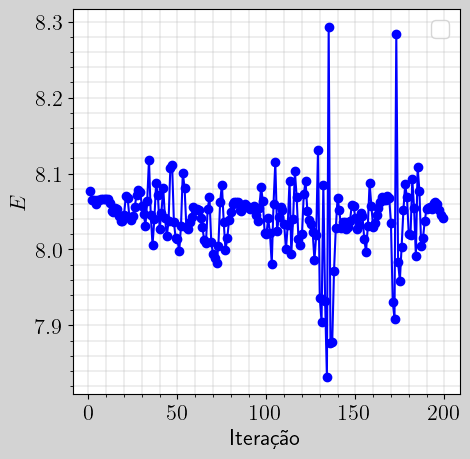

In [193]:
fname = "saidas/tarefa-A/energia.dat"
data = np.loadtxt(fname)
params = np.loadtxt("saidas/tarefa-A/parametros.dat")

num_particles = int(params[0])

L = params[1]
dt = params[3]

steps = data[:, 0]
E = data[:, 1]

fig , ax =  plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 
plt.legend()

ax.plot(steps, E, 'bo-', label=f"$E = T + \\mathcal\\{'U'}$")
ax.set_xlabel("Iteração")
ax.set_ylabel(f"$E$")

ax.grid(which="major", linewidth=0.3)
ax.minorticks_on()
ax.grid(which="minor", linewidth=0.3)
plt.show()

### Rastro

/tmp/ipykernel_4569/2964933980.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'bo', markersize=4,markeredgewidth=.3, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')


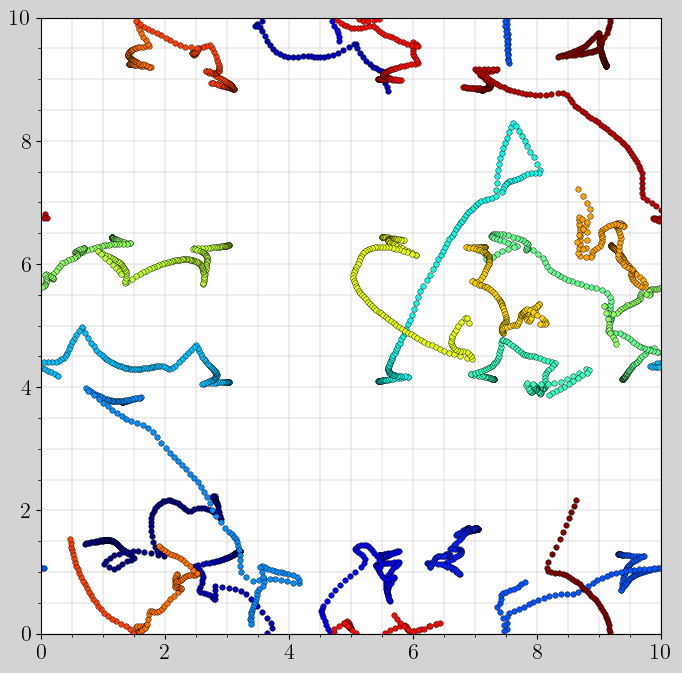

In [136]:
fname_positions = 'saidas/tarefa-A/evolucao-posicoes.dat'
data = np.loadtxt(fname_positions)

params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])

num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig, ax = plt.subplots(1, 1, figsize=(8,8), facecolor="lightgray")

colors = plt.cm.jet(np.linspace(0, 1, num_particles))

for i in range(num_particles):
    x = data[:, i, 1]
    y = data[:, i, 2]
    ax.plot(x, y, 'bo', markersize=4,markeredgewidth=.3, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')

plt.grid(which="major", linewidth=0.3)
plt.grid(which="minor", linewidth=0.3)
plt.minorticks_on()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.savefig(graphs_path+'tarefa-A/posicoes-finais.png', bbox_inches = 'tight')#  dpi=DPI)
# plt.show()

## Tests

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Read the data from the file
filename = 'system_state.dat'
data = np.loadtxt(filename)

# Number of particles and time steps
num_particles = 20
num_timesteps = data.shape[0] // num_particles

# Reshape the data to separate time steps and particles
data = data.reshape((num_timesteps, num_particles, -1))

# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(5,5), facecolor="lightgray")
particles, = ax.plot([], [], 'bo', color='black',marker='o',markerfacecolor='white',linestyle='',markersize=15)


plt.grid(which = "major", linewidth = 0.3)
plt.grid(which = "minor", linewidth = 0.3)
plt.minorticks_on()

# Set the limits of the plot
ax.set_xlim(0, 10)  # Adjust according to your data range
ax.set_ylim(0, 10)  # Adjust according to your data range


def init():
    """Initialize the background of the plot."""
    particles.set_data([], [])
    return particles,

def animate(i):
    """Update the plot for each frame."""
    x = data[i, :, 0]
    y = data[i, :, 1]
    particles.set_data(x, y)
    return particles,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=num_timesteps, init_func=init, blit=True)

# Save the animation as a GIF
ani.save('particle_simulation.gif', writer='imagemagick', dpi=100)
# ani.save('particle_simulation.mp4', writer='ffmpeg', dpi=DPI)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

filename = 'system_state.dat'
data = np.loadtxt(filename)

num_particles = 20
num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='lightgray')
particles, = ax.plot([], [], [], 'bo', color='black', marker='o', markerfacecolor='blue', linestyle='', markersize=8)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

time_text = ax.text2D(0.35, 1.05, '', transform=ax.transAxes, fontsize=22, color='black')

def init():
    particles.set_data([], [])
    particles.set_3d_properties([])
    time_text.set_text('')
    return particles, time_text

def animate(i):
    x = data[i, :, 0]
    y = data[i, :, 1]
    z = data[i, :, 2]
    particles.set_data(x, y)
    particles.set_3d_properties(z)
    return particles, time_text

ani = FuncAnimation(fig, animate, frames=num_timesteps, init_func=init, blit=True)
ani.save('anim.gif', writer='imagemagick', dpi=80)

## Tarefa B

- Loads data

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the specified file
data = np.loadtxt('saidas/tarefa-B/velocidades.dat')
params = np.loadtxt("saidas/tarefa-A/parametros.dat")

num_particles = int(params[0])
dt = params[3]
iteration = data[:, 0]

# extract intervals here.

v_mag = data[:, 1]
vx = data[:, 2]
vy = data[:, 3]

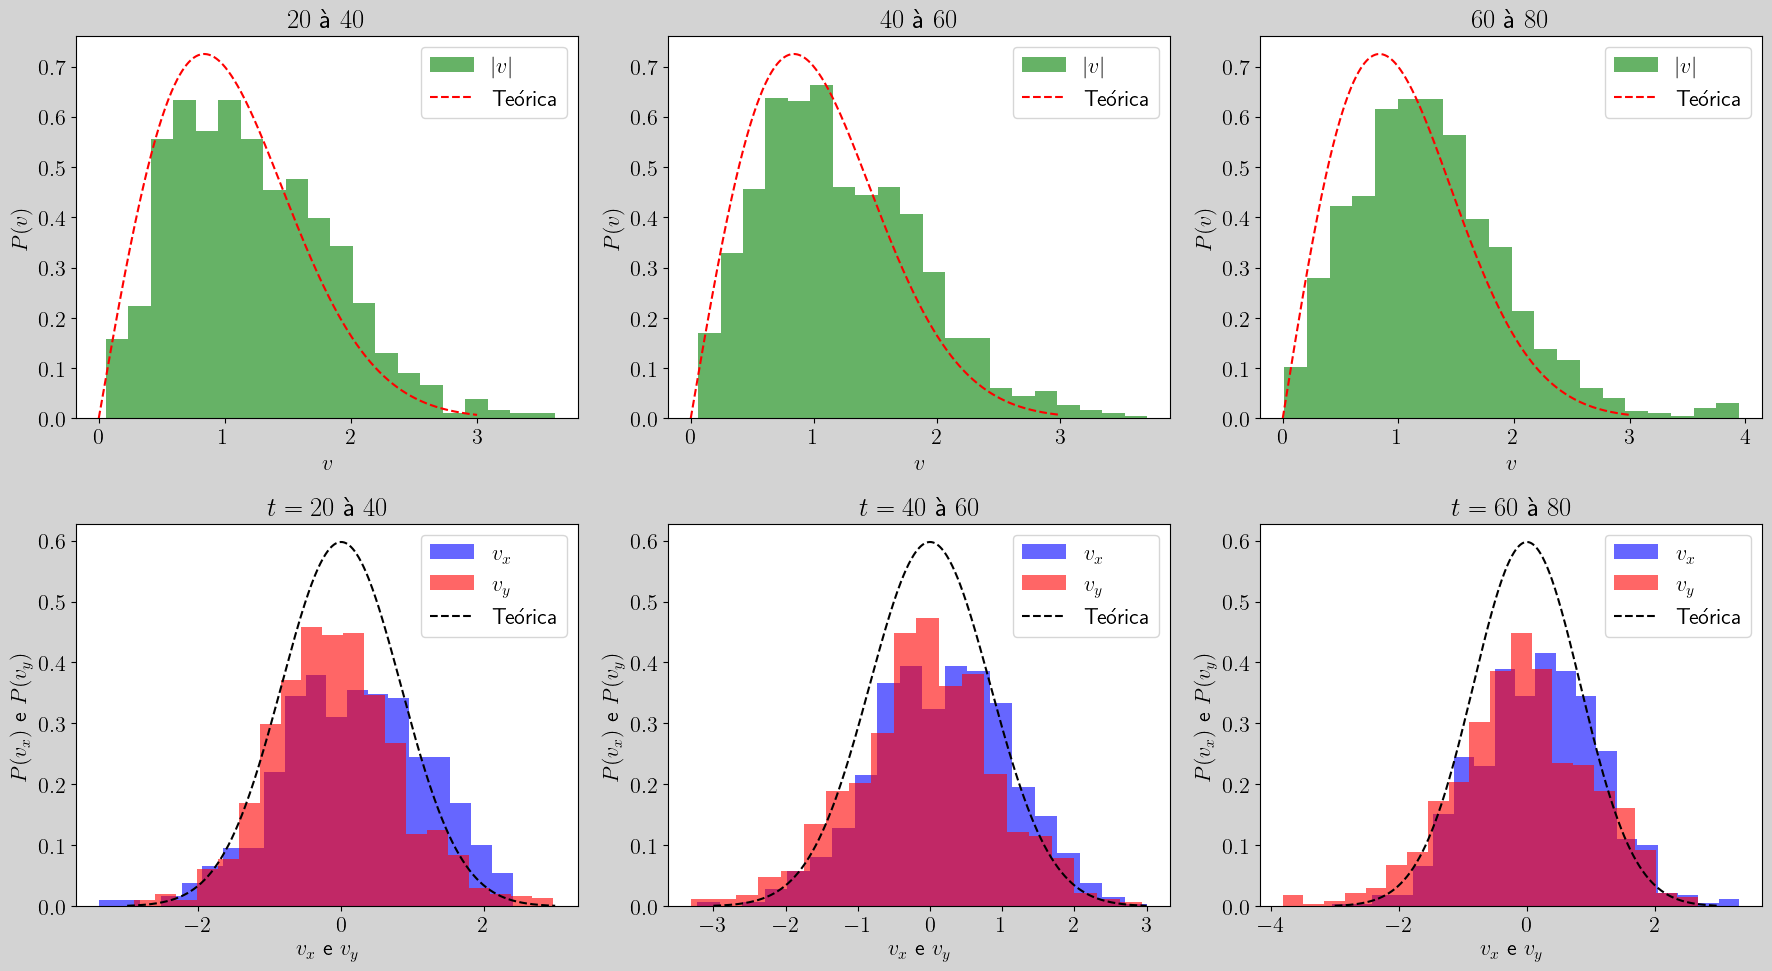

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the specified file
data = np.loadtxt('saidas/tarefa-B/velocidades.dat')
params = np.loadtxt("saidas/tarefa-A/parametros.dat")

num_particles = int(params[0])
dt = params[3]

ignore = 1000 # equilibrio
iterations = data[ignore:, 0]
v_mag = data[ignore:, 1]
vx = data[ignore:, 2]
vy = data[ignore:, 3]


time = iterations * dt
intervals = [(20, 40), (40, 60), (60, 80)]

kT = 0.7
v = np.linspace(0, 3, 500)
vx_vy = np.linspace(-3, 3, 500)

P_v = v / kT * np.exp(-v**2 / (2 * kT))
P_vx =  (0.5/ np.sqrt(kT)) * np.exp(-vx_vy**2 / (2 * kT))
P_vy =  (0.5/ np.sqrt(kT)) * np.exp(-vx_vy**2 / (2 * kT))

fig, axs = plt.subplots(2, 3, figsize=(18, 10), facecolor="lightgray")

for i, (t_start, t_end) in enumerate(intervals):
    mask = (time >= t_start) & (time < t_end)
    v_mag_interval = v_mag[mask]
    vx_interval = vx[mask]
    vy_interval = vy[mask]

    axs[0, i].hist(v_mag_interval, bins=20, density=True, alpha=0.6, color='g', label='$|v|$')
    v_range = np.linspace(0, np.max(v_mag_interval), 500)
    axs[0, i].plot(v, P_v, 'r--', label='Teórica')# $P(v) \\sim \\frac{v^2}{k_B T} \\exp\\left(-\\frac{mv^2}{2k_B T}\\right)$')
    axs[0, i].set_title(f'${t_start}$  à ${t_end}$')
    axs[0, i].set_xlabel('$v$')
    axs[0, i].set_ylabel('$P(v)$')
    axs[0, i].legend()

    axs[1, i].hist(vx_interval, bins=20, density=True, alpha=0.6, label='$v_x$', color='b')
    axs[1, i].hist(vy_interval, bins=20, density=True, alpha=0.6, label='$v_y$', color='r')
        
    axs[1, i].plot(vx_vy, P_vx, 'k--', label='Teórica') #$P(v) \\sim \\frac{1}{\\sqrt{k_B T}} \\exp\\left(-\\frac{mv^2}{2k_B T}\\right)$')
    axs[1, i].set_title(f'$t = {t_start}$ à ${t_end}$')
    axs[1, i].set_xlabel('$v_x$ e $v_y$')
    axs[1, i].set_ylabel('$P(v_x)$ e $P(v_y)$')
    axs[1, i].legend()

plt.tight_layout()

plt.savefig(graphs_path+'tarefa-B/distribuicoes-b.png', bbox_inches = 'tight')#  dpi=DPI)
plt.show()

In [ ]:
filename = 'saidas/tarefa-B/evolucao-posicoes.dat'
data = np.loadtxt(filename)

params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])


num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")
particles, = ax.plot([], [], 'bo', color='black', marker='o', markerfacecolor='white', linestyle='', markersize=15)

plt.grid(which="major", linewidth=0.3)
plt.grid(which="minor", linewidth=0.3)
plt.minorticks_on()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

def init():
    particles.set_data([], [])
    return particles,

skip = 1 

def animate(i):
    x = data[i * skip, :, 1]
    y = data[i * skip, :, 2]
    particles.set_data(x, y)
    return particles,

ani = animation.FuncAnimation(fig, animate, frames = num_timesteps // skip, init_func=init, blit=True)
# ani.save(graphs_path + 'tarefa-B/evolucao.gif', writer='imagemagick', dpi=DPI)
plt.close()
# HTML(ani.to_html5_video())

## Tarefa C

In [ ]:
data = np.loadtxt("saidas/tarefa-C/posicoes-iniciais.dat")


params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])

X = np.linspace(0, 10, data.shape[0])
Y = np.linspace(0, 10, data.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="lightgray")

plt.xlim(0, 10)
plt.ylim(0, 10)

num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))


plt.grid(which = "major", linewidth = 0.3)
plt.grid(which = "minor", linewidth = 0.3)
plt.minorticks_on()


colors = plt.cm.jet(np.linspace(0, 1, num_particles))

for i in range(num_particles):
    x = data[:, i, 0]
    y = data[:, i, 1]
    ax.plot(x, y, 'o', markersize=9, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')
plt.show()

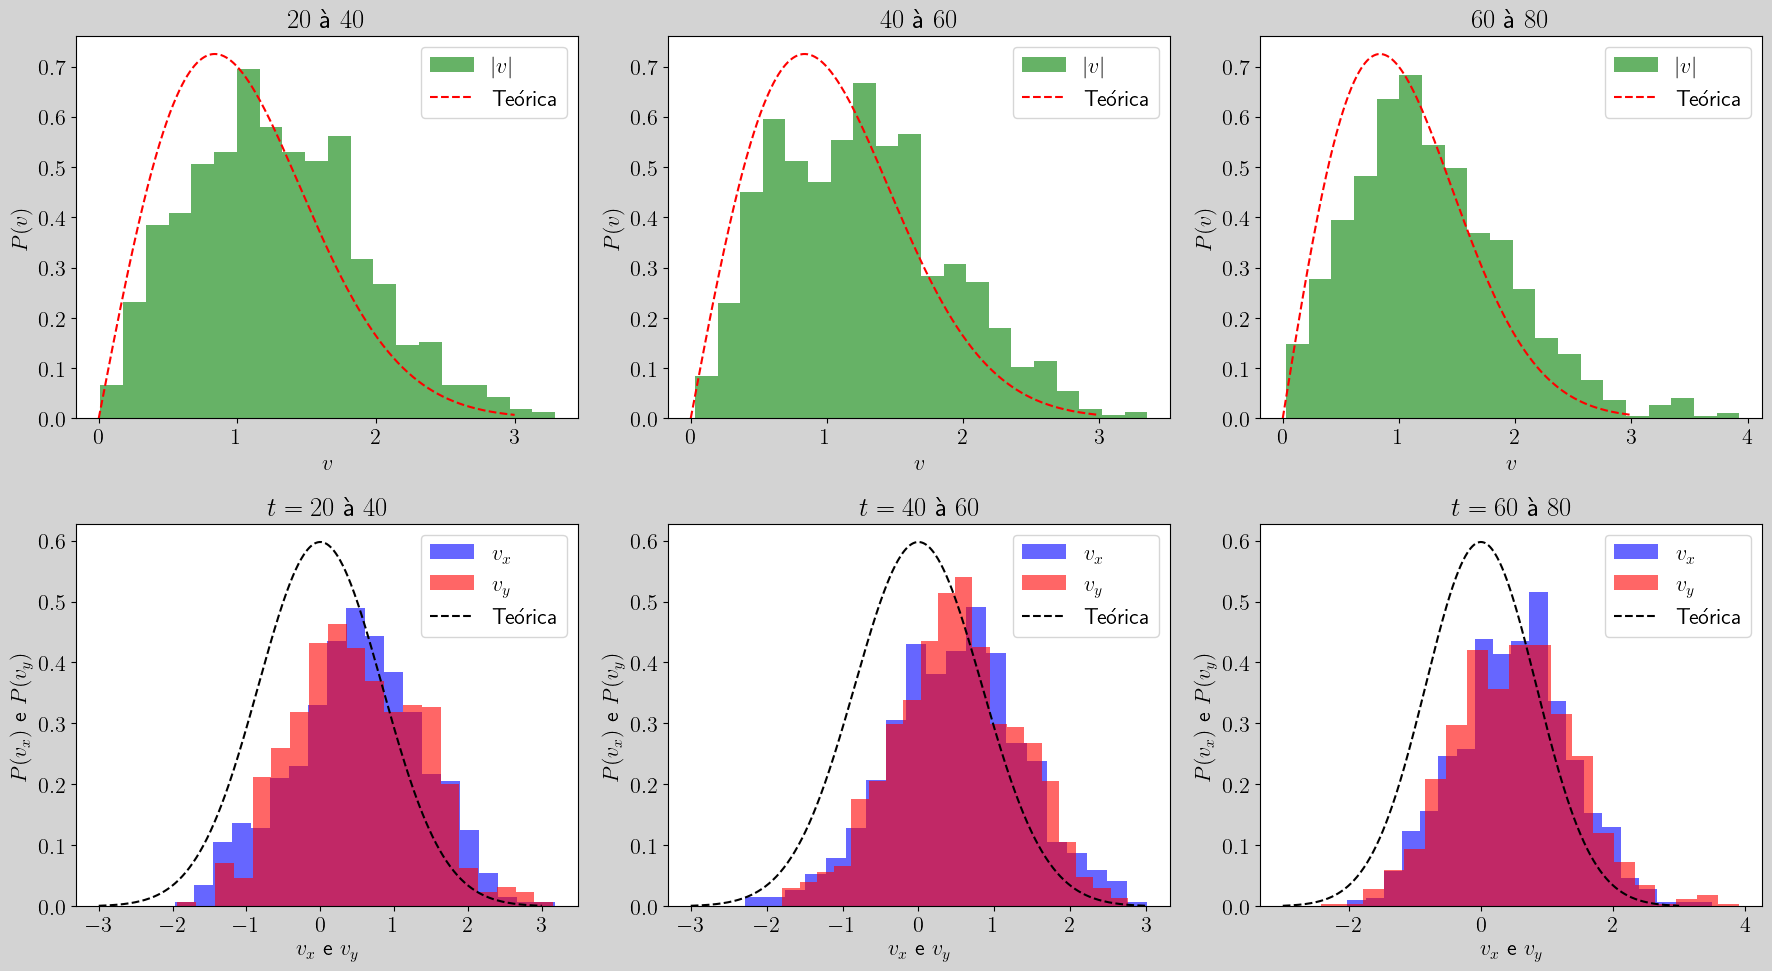

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the specified file
data = np.loadtxt('saidas/tarefa-C/velocidades.dat')
params = np.loadtxt("saidas/tarefa-A/parametros.dat")

num_particles = int(params[0])
dt = params[3]


ignore = 1000 # equilibrio
iterations = data[ignore:, 0]
v_mag = data[ignore:, 1]
vx = data[ignore:, 2]
vy = data[ignore:, 3]

time = iterations * dt
intervals = [(20, 40), (40, 60), (60, 80)]

kT = 0.7
v = np.linspace(0, 3, 500)
vx_vy = np.linspace(-3, 3, 500)

P_v = v / kT * np.exp(-v**2 / (2 * kT))
P_vx =  (0.5/ np.sqrt(kT)) * np.exp(-vx_vy**2 / (2 * kT))
P_vy =  (0.5/ np.sqrt(kT)) * np.exp(-vx_vy**2 / (2 * kT))

fig, axs = plt.subplots(2, 3, figsize=(18, 10), facecolor="lightgray")

for i, (t_start, t_end) in enumerate(intervals):
    mask = (time >= t_start) & (time < t_end)
    v_mag_interval = v_mag[mask]
    vx_interval = vx[mask]
    vy_interval = vy[mask]

    axs[0, i].hist(v_mag_interval, bins=20, density=True, alpha=0.6, color='g', label='$|v|$')
    v_range = np.linspace(0, np.max(v_mag_interval), 500)
    axs[0, i].plot(v, P_v, 'r--', label='Teórica') # $P(v) \\sim \\frac{v^2}{k_B T} \\exp\\left(-\\frac{mv^2}{2k_B T}\\right)$')
    axs[0, i].set_title(f'${t_start}$  à ${t_end}$')
    axs[0, i].set_xlabel('$v$')
    axs[0, i].set_ylabel('$P(v)$')
    axs[0, i].legend()

    axs[1, i].hist(vx_interval, bins=20, density=True, alpha=0.6, label='$v_x$', color='b')
    axs[1, i].hist(vy_interval, bins=20, density=True, alpha=0.6, label='$v_y$', color='r')
        
    axs[1, i].plot(vx_vy, P_vx, 'k--', label='Teórica') # $P(v) \\sim \\frac{1}{\\sqrt{k_B T}} \\exp\\left(-\\frac{mv^2}{2k_B T}\\right)$')
    axs[1, i].set_title(f'$t = {t_start}$ à ${t_end}$')
    axs[1, i].set_xlabel('$v_x$ e $v_y$')
    axs[1, i].set_ylabel('$P(v_x)$ e $P(v_y)$')
    axs[1, i].legend()

plt.tight_layout()
plt.savefig(graphs_path+'tarefa-C/distribuicoes-c.png', bbox_inches = 'tight')#  dpi=DPI)
plt.show()

In [ ]:
filename = 'saidas/tarefa-C/evolucao-posicoes.dat'
data = np.loadtxt(filename)

params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])


num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")
particles, = ax.plot([], [], 'bo', color='black', marker='o', markerfacecolor='white', linestyle='', markersize=15)

plt.grid(which="major", linewidth=0.3)
plt.grid(which="minor", linewidth=0.3)
plt.minorticks_on()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

def init():
    particles.set_data([], [])
    return particles,

def animate(i):
    x = data[i, :, 1]
    y = data[i, :, 2]
    particles.set_data(x, y)
    return particles,

ani = animation.FuncAnimation(fig, animate, frames = num_timesteps, init_func=init, blit=True)
# ani.save(graphs_path + 'tarefa-C/evolucao.gif', writer='imagemagick', dpi=DPI)
# plt.close()
HTML(ani.to_html5_video())

In [ ]:
fname_positions = 'saidas/tarefa-C/evolucao-posicoes.dat'
data = np.loadtxt(fname_positions)

params = np.loadtxt("saidas/tarefa-A/parametros.dat")
num_particles = int(params[0])

num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))

fig, ax = plt.subplots(1, 1, figsize=(8,8), facecolor="lightgray")

colors = plt.cm.jet(np.linspace(0, 1, num_particles))

for i in range(num_particles):
    x = data[:, i, 1]
    y = data[:, i, 2]
    ax.plot(x, y, 'o', markersize=4,markeredgewidth=.3, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')

plt.grid(which="major", linewidth=0.3)
plt.grid(which="minor", linewidth=0.3)
plt.minorticks_on()

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

## Tarefa D 

In [201]:
dataB = np.loadtxt("saidas/tarefa-D/temperatura-b.dat")
dataC = np.loadtxt("saidas/tarefa-D/temperatura-c.dat")

dataB = dataB[1000:]
dataC = dataC[1000:]

print("T_B: {} +- {}".format(np.mean(dataB), np.std(dataB, ddof=1)))
print("T_C: {} +- {}".format(np.mean(dataC), np.std(dataC, ddof=1)))

T_B: 0.9666851503945411 +- 0.9671660570584965
T_C: 1.0189824932916516 +- 1.0224347800619042


## Tarefa E

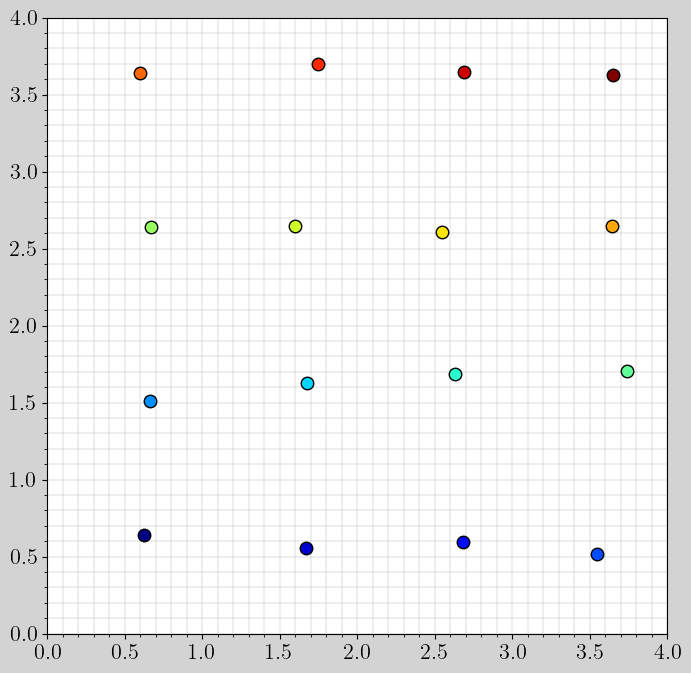

In [200]:
data = np.loadtxt("saidas/tarefa-E/posicoes-iniciais.dat")
params = np.loadtxt("saidas/tarefa-E/parametros.dat")
num_particles = int(params[0])
L = int(params[1])

X = np.linspace(0, L, data.shape[0])
Y = np.linspace(0, L, data.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(8, 8), facecolor="lightgray")

plt.xlim(0, L)
plt.ylim(0, L)

num_timesteps = data.shape[0] // num_particles

data = data.reshape((num_timesteps, num_particles, -1))


plt.grid(which = "major", linewidth = 0.3)
plt.grid(which = "minor", linewidth = 0.3)
plt.minorticks_on()

colors = plt.cm.jet(np.linspace(0, 1, num_particles))

for i in range(num_particles):
    x = data[:, i, 0]
    y = data[:, i, 1]
    ax.plot(x, y, 'o', markersize=9, color='black', markerfacecolor=colors[i], label=f'Particle {i+1}')
plt.show()

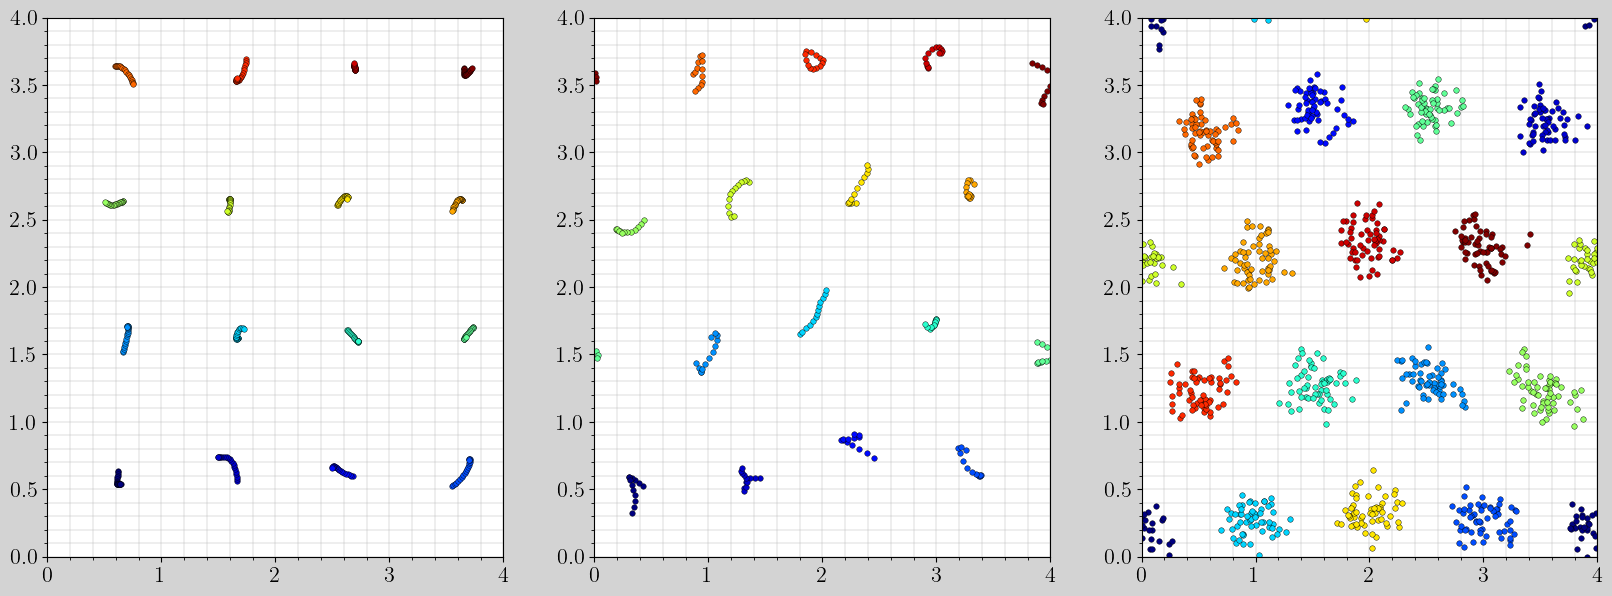

In [222]:
fig, ax = plt.subplots(1, 3, figsize=(20,7), facecolor="lightgray")
for i in range(1, 4):
    fname_positions = f'saidas/tarefa-E/evolucao-posicoes-{i}.dat'
    data = np.loadtxt(fname_positions)
    params = np.loadtxt("saidas/tarefa-E/parametros.dat")
    num_particles = int(params[0])
    L = params[1]
    dt = params[3]
    
    ax[i-1].grid(which="major", linewidth=0.3)
    ax[i-1].grid(which="minor", linewidth=0.3)
    ax[i-1].minorticks_on()

    num_timesteps = data.shape[0] // num_particles
    data = data.reshape((num_timesteps, num_particles, -1))
    colors = plt.cm.jet(np.linspace(0, 1, num_particles))
    for j in range(num_particles):
        x = data[:, j, 1]
        y = data[:, j, 2]
        ax[i-1].plot(x, y, 'o', markersize=4,markeredgewidth=.3, color='black', markerfacecolor=colors[j], label=f'Particle {j+1}')
    ax[i-1].set_xlim(0, L)
    ax[i-1].set_ylim(0, L)
plt.savefig(graphs_path + f'tarefa-E/posicoes-finais.png', bbox_inches='tight', dpi=DPI)

## Tarefa F

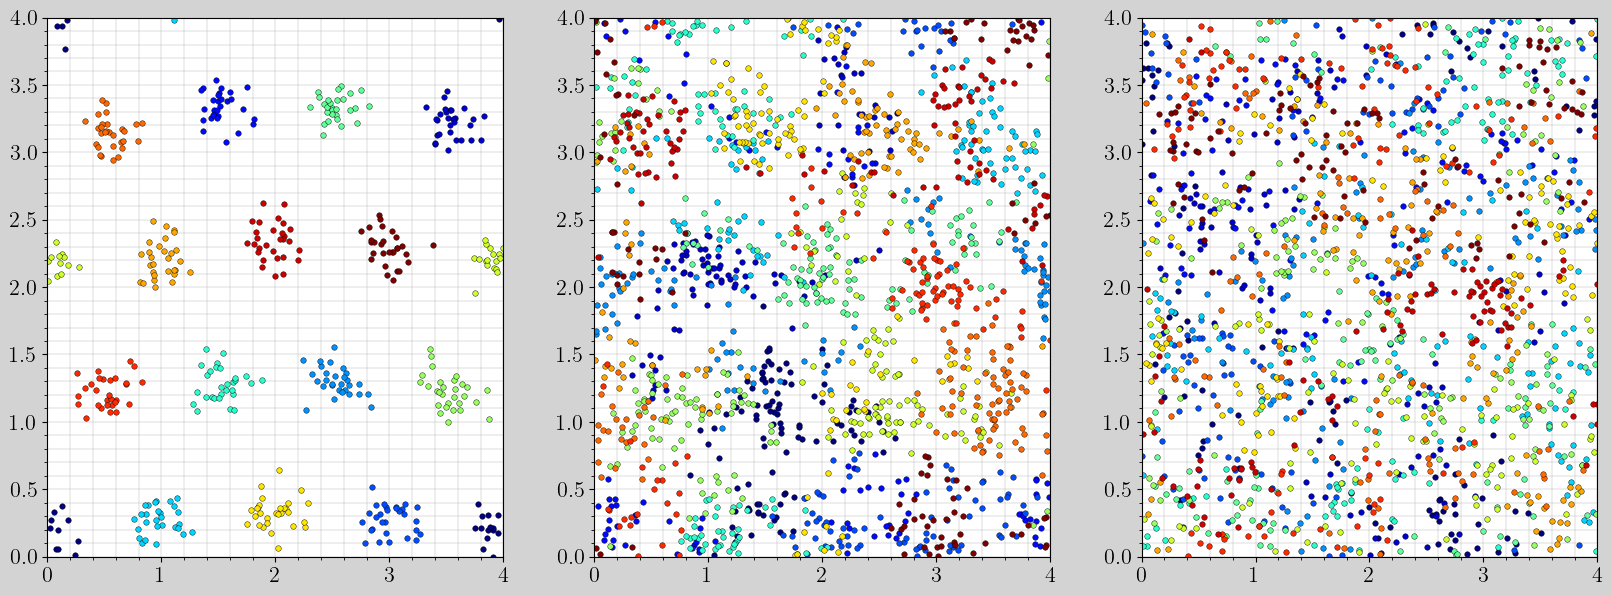

In [223]:
fig, ax = plt.subplots(1, 3, figsize=(20,7), facecolor="lightgray")
for i in range(1, 4):
    fname_positions = f'saidas/tarefa-F/evolucao-posicoes-{i}.dat'
    data = np.loadtxt(fname_positions)
    params = np.loadtxt("saidas/tarefa-F/parametros.dat")
    num_particles = int(params[0])
    L = params[1]
    dt = params[3]
    
    ax[i-1].grid(which="major", linewidth=0.3)
    ax[i-1].grid(which="minor", linewidth=0.3)
    ax[i-1].minorticks_on()

    num_timesteps = data.shape[0] // num_particles
    data = data.reshape((num_timesteps, num_particles, -1))
    colors = plt.cm.jet(np.linspace(0, 1, num_particles))
    for j in range(num_particles):
        x = data[:, j, 1]
        y = data[:, j, 2]
        ax[i-1].plot(x, y, 'o', markersize=4,markeredgewidth=.3, color='black', markerfacecolor=colors[j], label=f'Particle {j+1}')
    ax[i-1].set_xlim(0, L)
    ax[i-1].set_ylim(0, L)
plt.savefig(graphs_path + f'tarefa-F/posicoes-finais.png', bbox_inches='tight', dpi=DPI)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


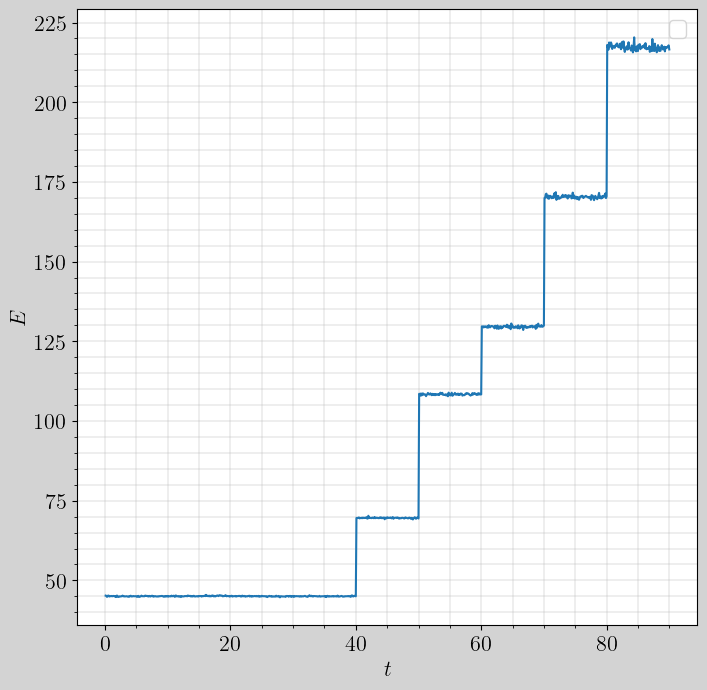

In [202]:
fname = "saidas/tarefa-F/energia.dat"
data = np.loadtxt(fname)
params = np.loadtxt("saidas/tarefa-F/parametros.dat")

num_particles = int(params[0])
L = params[1]
dt = params[3]
steps = data[:, 0]
E = data[:, 1]

fig , ax =  plt.subplots(1, 1, figsize=(8,8), facecolor="lightgray")

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

ax.plot(steps * dt, E, '-')
ax.set_xlabel("$t$")
ax.set_ylabel(f"$E$")

ax.grid(which="major", linewidth=0.3)
ax.minorticks_on()
ax.grid(which="minor", linewidth=0.3)
plt.legend()
plt.savefig(graphs_path + f'tarefa-F/energia.png', bbox_inches='tight', dpi=DPI)
plt.show()